# My Youtube Watch History : Analysis
<i> Mélanie Picot (2024) <i>

This notebook aims to perform an exploratory analysis of my youtube data.
(In the previous notebook I retrieved the data from my watch history and the youtube API, cleaned and formatted them.)

Analysis of the videos history :
Genre and number : What genre of content did I watch? What my favorite? 
Time : How much time did I stayed in front of youtube? Did I watched a lot of youtube-shorts? At what hour of the day? More on the weekend? (Timeframe?)

Analysis of the videos statistique : 
from statistics published by Youtube : big disparity in the content published, with an enormous number of videos with 0 views (source?) What does the algorithm proposed to me : Can we see the disparity? classed more by views?Like?Comments? Is there some links between those ?

Analysis of the channel of my favorite youtubers  : 
Already like by others? Analysis views and subscriber. 



## Datas importation

In [4]:
import pandas as pd
import numpy as np
import openpyxl 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [392]:
xls = pd.ExcelFile('youtube_data.xlsx')
df_channel = pd.read_excel(xls, 'channel_data')
df_video = pd.read_excel(xls, 'video_data_complete')

In [6]:
df_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           68206 non-null  object        
 1   Published_date  68206 non-null  datetime64[ns]
 2   Views           68206 non-null  int64         
 3   Like            68206 non-null  int64         
 4   Comments        68206 non-null  int64         
 5   Videocategory   68206 non-null  object        
 6   titleUrl        68206 non-null  object        
 7   time            68206 non-null  datetime64[ns]
 8   video_ID        68206 non-null  object        
 9   creator         68206 non-null  object        
 10  channel_url     68206 non-null  object        
 11  channel_id      68206 non-null  object        
 12  year            68206 non-null  int64         
 13  duration        68206 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)


## Analysis DataFrame video 

### Video History : How many videos and what genre ?

#### Number of videos

##### Total Number

In [11]:
nbTotVideo = len(df_video)
nbTotVideo

68206

##### Graph - Number of videos/year

In [13]:
#df_video = df_video[df_video['duration'].notnull()]
nbVideoYear = df_video.groupby('year').size()
nbVideoYear

year
2018     9045
2019      793
2020     1048
2021     6097
2022    23105
2023    28118
dtype: int64

In [14]:
nbVideoYear[2022]/nbTotVideo*100

33.87531888690145

In [15]:
nbVideoYear[2023]/nbTotVideo*100

41.225112160220505

In [16]:
(nbVideoYear[2022]+nbVideoYear[2023])/nbTotVideo*100

75.10043104712196

C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


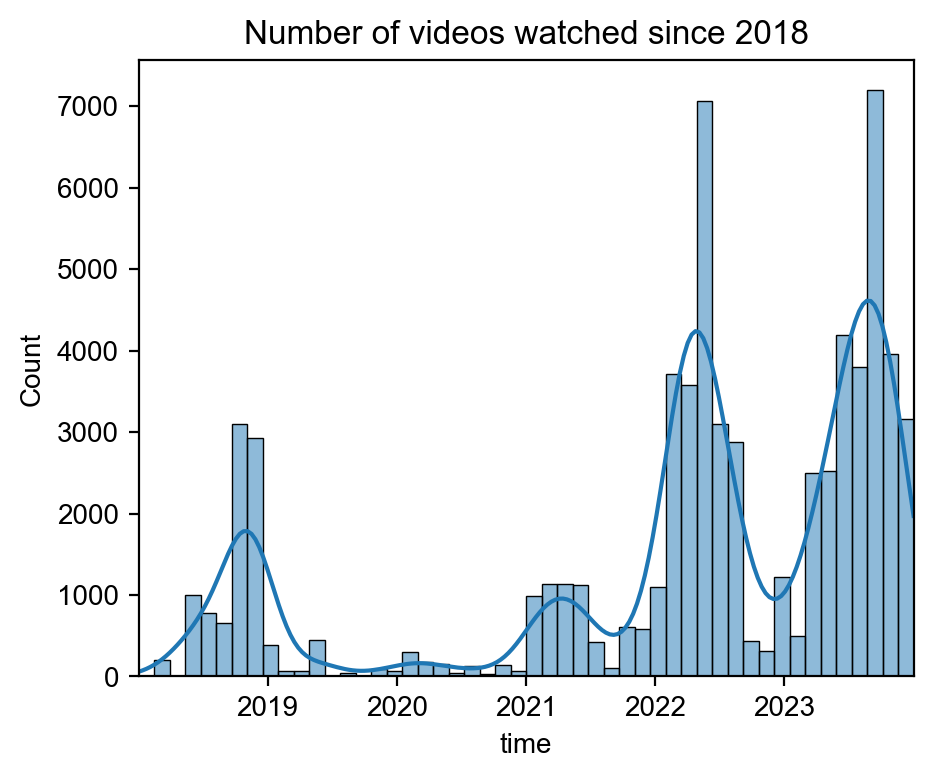

In [17]:
fig = plt.figure(figsize=(5,4),dpi=200)
sns.histplot(data=df_video,x='time',kde=True,bins=50)
plt.title('Number of videos watched since 2018')
plt.xlim(df_video['time'].min(),df_video['time'].max())

sns.set_style("whitegrid", {'axes.grid' : False})

fig.savefig('Nb_video_1823.png')

#### Time spend on youtube

In [19]:
df_video.duration.sum()

356113.53

In [20]:
np.round(df_video.duration.sum()/60/24,1)

247.3

In [21]:
time_yt = df_video.groupby('year')['duration'].agg(['sum']).sort_values('sum',ascending=False).reset_index()
time_yt

,year,sum
0,2023,141168.81
1,2022,107886.81
2,2021,64640.21
3,2018,31937.61
4,2020,7407.52
5,2019,3072.57


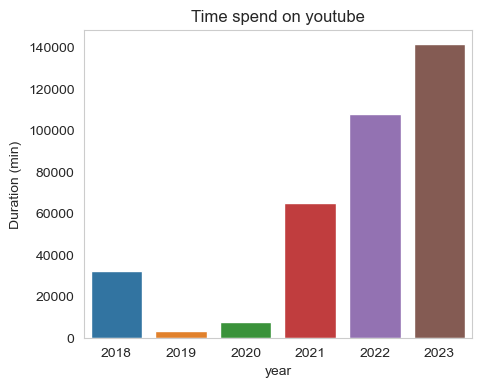

In [22]:
fig = plt.figure(figsize=(5,4))
sns.barplot(data=time_yt ,x='year',y='sum')
plt.title('Time spend on youtube')
plt.ylabel('Duration (min)')

plt.savefig('duration.png',bbox_inches='tight')

In [23]:
most_time_watched = df_video.groupby('creator')['duration'].sum().sort_values(ascending=False)[:3]
most_time_watched

creator
CloudKid              60411.61
sunsetdreams          25682.59
ImagineDragonsVEVO    18494.56
Name: duration, dtype: float64

In [24]:
most_time_watched.iloc[0]/60/24

41.952506944444444

#### Genre of Videos

##### Exploration

In [27]:
nbVideoCat = pd.DataFrame({'counts' : df_video.groupby('Videocategory').size().sort_values(ascending=False)})
nbVideoCat['per'] = (nbVideoCat['counts']/nbTotVideo)*100
nbVideoCat

,counts,per
Videocategory,,
Music,43450,63.704073
People&Blog,10091,14.794886
Entertainment,6282,9.210333
Film&Animation,3380,4.955576
Comedy,1411,2.068733
Gaming,1033,1.514530
Education,883,1.294608
HowTo&Style,493,0.722810
Science&Technology,423,0.620180


In [28]:
my_new_group_categories = {'Music':'Music','People&Blog':'People&Blog','Entertainment':'Entertainment','Film&Animation':'Film&Animation','Comedy':'Comedy',
                           'Gaming':'Gaming','Education':'Education','HowTo&Style':'Others','Science&Technology':'Others', 'News&Politics':'Others', 'Sports':'Others',
                           'Travel&Events':'Others', 'Pets&Animal':'Others', 'Autos':'Others', 'NonProfits&Activism':'Others', 'Trailers':'Others'}

In [29]:
df_video['group_category'] = df_video['Videocategory'].map(my_new_group_categories)

In [30]:
per_nbVideo_NewCat = (df_video['group_category'].value_counts()/nbTotVideo)*100
per_nbVideo_NewCat.sort_values(ascending=False)

group_category
Music             63.704073
People&Blog       14.794886
Entertainment      9.210333
Film&Animation     4.955576
Others             2.457262
Comedy             2.068733
Gaming             1.514530
Education          1.294608
Name: count, dtype: float64

##### Graph - videos categories since 2018

C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


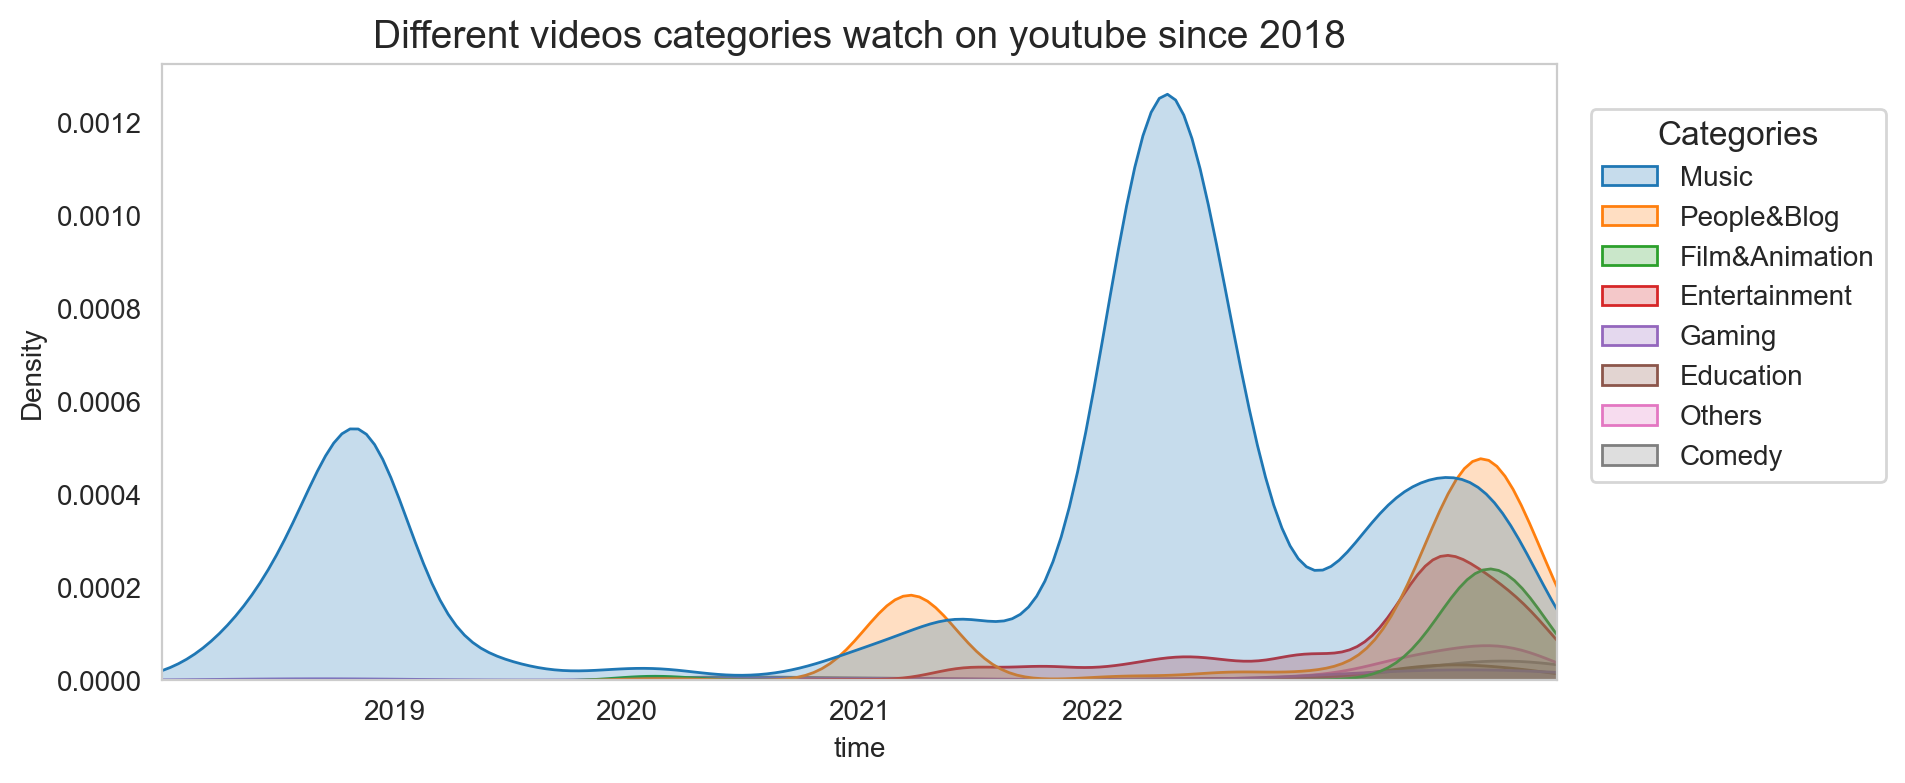

In [32]:
fig= plt.figure(figsize=(9,4),dpi=200)

ax = sns.kdeplot(data=df_video, x='time',hue='group_category',fill=True)

plt.xlim(df_video['time'].min(),df_video['time'].max())
sns.move_legend(ax, "lower center", bbox_to_anchor=(1.13, 0.3), title_fontsize=12,title='Categories')
plt.title('Different videos categories watch on youtube since 2018',fontsize=14)

fig.savefig('VidCat_1823.png',bbox_inches='tight')
plt.show()

##### Graph - zoom 2023 - Diversification of taste

In [34]:
cat_2023 = df_video[df_video.year == 2023]['group_category'].value_counts().sort_values(ascending=False)[:5]
df_2023_cat = pd.DataFrame({'per_cat' : cat_2023/nbVideoYear[2023]*100}).reset_index()
df_2023_cat

,group_category,per_cat
0,Music,32.836617
1,People&Blog,26.132726
2,Entertainment,15.865282
3,Film&Animation,11.419731
4,Others,5.174621


In [35]:
cat_2022 = df_video[df_video.year == 2022]['group_category'].value_counts().sort_values(ascending=False)[:5]
df_2022_cat = pd.DataFrame({'per_cat' :cat_2022/nbVideoYear[2022]*100}).reset_index()
df_2022_cat

,group_category,per_cat
0,Music,91.400130
1,Entertainment,5.094135
2,People&Blog,1.774508
3,Others,0.588617
4,Education,0.549665


In [36]:
order_list = ['Music', 'People&Blog', 'Entertainment','Film&Animation','Others','Education']

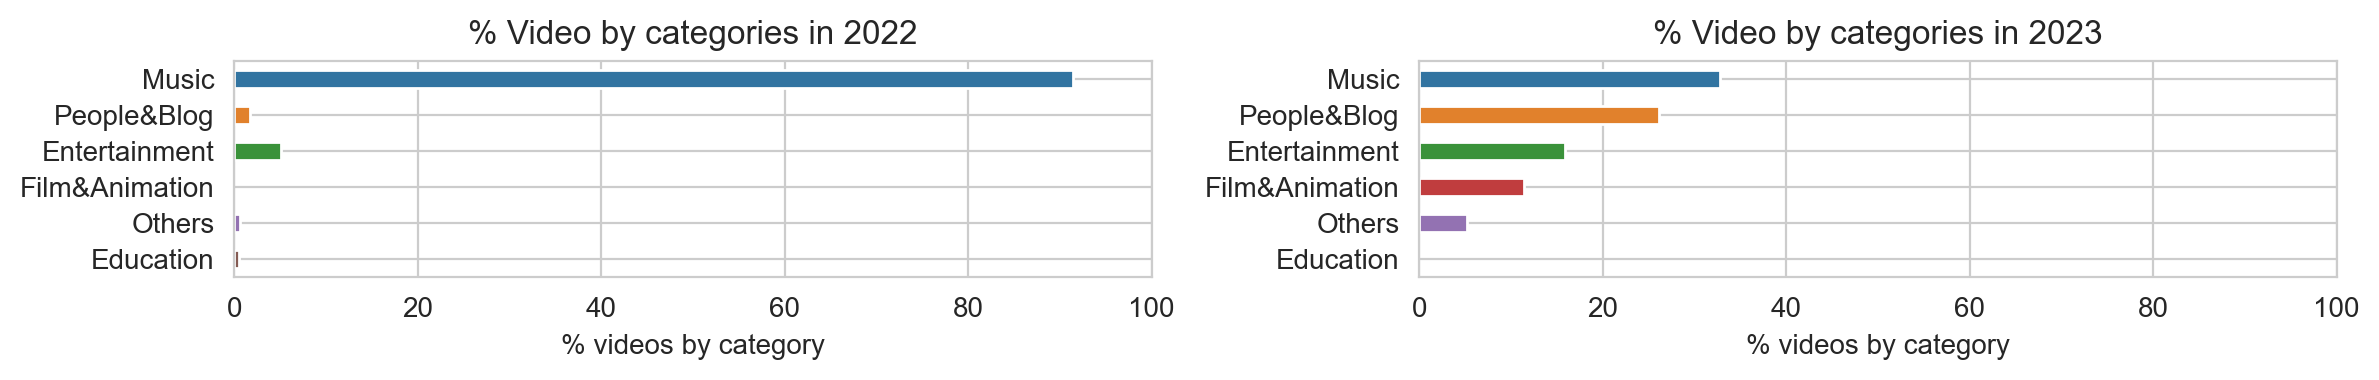

In [37]:
fig, axes = plt.subplots(1, 2,figsize=(12,2),dpi=200)
sns.barplot(data=df_2022_cat,x="per_cat",y="group_category",ax=axes[0],width=0.5,order=order_list)
sns.barplot(data=df_2023_cat,x="per_cat",y="group_category",ax=axes[1],width=0.5,order=order_list)

axes[0].set_title('% Video by categories in 2022')
axes[1].set_title('% Video by categories in 2023')

for ax in axes.flat:
    ax.set(xlabel='% videos by category', ylabel='')
    ax.set_xlim(0,100)    
    ax.grid("whitegrid")
    
plt.tight_layout()

fig.savefig("per_videocat_22et23.png",bbox_inches='tight')



### Video History : Lenght categories on youtube?

#### Categorization of video lenght

In [40]:
df_video.loc[df_video.duration <=0.59, 'lenght_video'] = 'yt-shorts'
df_video.loc[(df_video.duration >0.59)&(df_video.duration<=4), 'lenght_video'] = '1 to 4min videos'
df_video.loc[(df_video.duration >4)&(df_video.duration<=20), 'lenght_video'] = '4 to 20 min videos'
df_video.loc[(df_video.duration >20)&(df_video.duration<=45), 'lenght_video'] = '20 to 45 min videos'
df_video.loc[df_video.duration > 45, 'lenght_video'] = 'over 45min videos'

In [41]:
df_video['lenght_video'].value_counts()

lenght_video
1 to 4min videos       41005
yt-shorts              12114
4 to 20 min videos     11672
20 to 45 min videos     2349
over 45min videos       1066
Name: count, dtype: int64

##### Graph - Lenght Video since 2018

C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


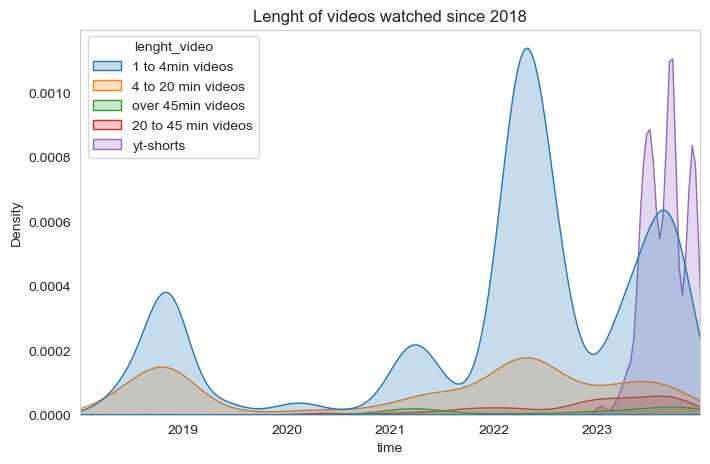

In [43]:
fig,ax = plt.subplots(figsize=(8,5),dpi=100)
ax = sns.kdeplot(data=df_video,x='time',hue='lenght_video',fill=True)

plt.title('Lenght of videos watched since 2018')
plt.xlim(df_video['time'].min(),df_video['time'].max())

sns.move_legend(ax, "lower center", bbox_to_anchor=(0.15, 0.65))

fig.savefig('lenghtvideo.png',bbox_inches='tight')

##### % lenght video since 2018

In [45]:
per_shorts = 100*11734/len(df_video)
print(f'shorts = {np.round(per_shorts,1)}%')
per_svideo = 100*40997/len(df_video)
print(f's-video = {np.round(per_svideo,1)}%')
per_mvideo = 100*11585/len(df_video)
print(f'm-video = {np.round(per_mvideo,1)}%')
per_lvideo = 100*2152/len(df_video)
print(f'l-video = {np.round(per_lvideo,1)}%')
per_xlvideo = 100*924/len(df_video)
print(f'xl-video = {np.round(per_xlvideo,1)}%')

shorts = 17.2%
s-video = 60.1%
m-video = 17.0%
l-video = 3.2%
xl-video = 1.4%


#### These shorts videos :

In [47]:
short_video = df_video[(df_video['duration']>0.59)&(df_video['duration']<=4)]
XS_video = df_video[df_video['duration']<1]

In [48]:
XS_video['Videocategory'].value_counts()[:5]

Videocategory
People&Blog      5781
Entertainment    2901
Comedy            917
Gaming            503
Education         410
Name: count, dtype: int64

In [49]:
short_video['Videocategory'].value_counts()[:5]

Videocategory
Music             33669
People&Blog        3557
Film&Animation     2899
Entertainment       562
Gaming              166
Name: count, dtype: int64

In [50]:
per_top1_short = np.round(100*short_video['Videocategory'].value_counts().iloc[0]/len(short_video['Videocategory']),1)
print(f'{per_top1_short}% of this videos(1min-4min) are music videos')

82.1% of this videos(1min-4min) are music videos


In [51]:
per_top1_xs = np.round(100*XS_video['Videocategory'].value_counts().iloc[0]/len(XS_video['Videocategory']),1)
print(f'{per_top1_xs}% of this videos(1min-4min) are People&Blog videos')

47.7% of this videos(1min-4min) are People&Blog videos


### Video History : Which hour did I watched video?

In [53]:
df_video['hour'] = df_video['time'].dt.hour

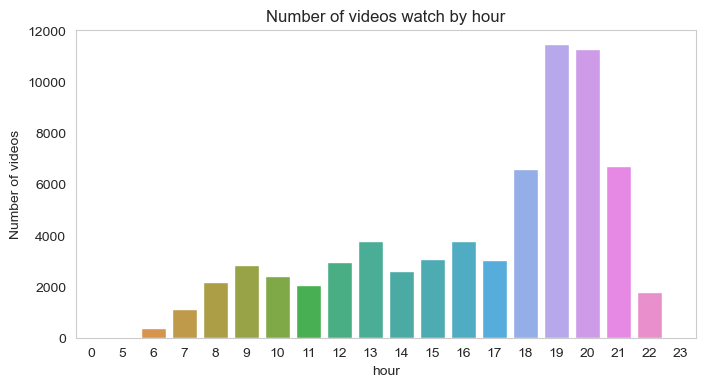

In [54]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(data=df_video,x='hour')

ax.set_xlabel('hour')
ax.set_ylabel('Number of videos')
ax.set_title('Number of videos watch by hour')

fig.savefig('hourwatchtime.png')

In [55]:
hours=[18,19,20,21,22]
total=[]
for i in hours : 
    video = np.round(len(df_video[df_video['hour'] == i])/nbTotVideo*100,1)
    print(f'{i}h : {video}%')
    total.append(video)
    
print(f'total : {np.round(sum(total),1)}%')


18h : 9.7%
19h : 16.8%
20h : 16.5%
21h : 9.8%
22h : 2.6%
total : 55.4%


In [56]:
df_video[df_video['time'].dt.hour == 19]['Videocategory'].value_counts()[:3]

Videocategory
Music            7999
People&Blog      1694
Entertainment     874
Name: count, dtype: int64

In [57]:
df_video[df_video['time'].dt.hour == 20]['Videocategory'].value_counts()[:3]

Videocategory
Music            8002
People&Blog      1414
Entertainment    1132
Name: count, dtype: int64

In [58]:
df_video[df_video['time'].dt.hour == 13]['Videocategory'].value_counts()[:3]

Videocategory
Music             2273
Film&Animation     441
People&Blog        402
Name: count, dtype: int64

## 

* 68 206 videos watch on youtube from 2018 to 2023. 75% between 2022 and 2023.
* Mostly Music (63.7%), People&Blog (15%) and Entertainment (9.2%). Even though music was the dominant category in the early years, there is diversification in 2023.
* In 6 years, I have seen a cumulative of 247.3 days of videos. Just in 2023 : 98 days!
* Most of the video I watched last 1 to 4 min (and 82,1% of those are Music videos), but in 2023 I have seen a lot of "youtube-shorts"(17.2%) (The trend got me ....)
* Finally, 55% of the videos I watched are between 18h and 22h.

## Videos statistique

### Creation DataFrame with unique videos

In [63]:
#probleme : plusieur fois la meme video --> DataFrame avec une seule repre des video
df_video_unique= df_video.copy()
df_video_unique = df_video_unique[['title','Views','Like','Comments','group_category','Videocategory','video_ID','creator']]
df_video_unique = df_video_unique.drop_duplicates().reset_index()

In [64]:
df_video_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14229 entries, 0 to 14228
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           14229 non-null  int64 
 1   title           14229 non-null  object
 2   Views           14229 non-null  int64 
 3   Like            14229 non-null  int64 
 4   Comments        14229 non-null  int64 
 5   group_category  14229 non-null  object
 6   Videocategory   14229 non-null  object
 7   video_ID        14229 non-null  object
 8   creator         14229 non-null  object
dtypes: int64(4), object(5)
memory usage: 1000.6+ KB


### Analysis stats 

#### Description

In [67]:
df_video_unique[['Views','Like','Comments']].describe()

,Views,Like,Comments
count,1.422900e+04,1.422900e+04,1.422900e+04
mean,2.601097e+07,6.332927e+05,6.828236e+03
std,1.318150e+08,1.948795e+06,4.065030e+04
min,9.000000e+00,0.000000e+00,0.000000e+00
25%,2.796970e+05,8.948000e+03,1.970000e+02
50%,1.480947e+06,5.910400e+04,6.950000e+02
75%,8.661322e+06,3.360650e+05,2.739000e+03
max,6.263949e+09,4.865887e+07,2.334201e+06


#### Graph Distribution Views,Like and Comments

C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


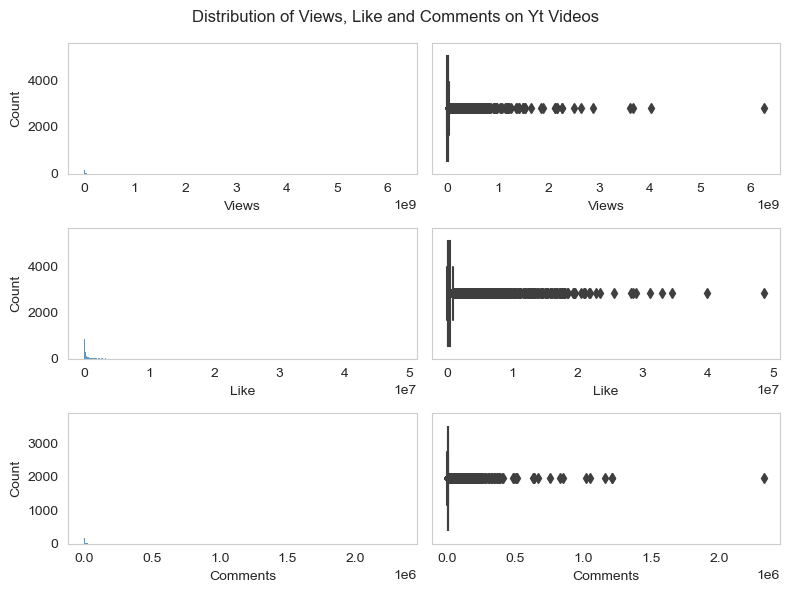

In [69]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(8,6))

sns.histplot(data=df_video_unique,x='Views',ax=axes[0][0])
sns.boxplot(data=df_video_unique,x='Views',ax=axes[0][1])
sns.histplot(data=df_video_unique,x='Like',ax=axes[1][0])
sns.boxplot(data=df_video_unique,x='Like',ax=axes[1][1])
sns.histplot(data=df_video_unique,x='Comments',ax=axes[2][0])
sns.boxplot(data=df_video_unique,x='Comments',ax=axes[2][1])

fig.suptitle("Distribution of Views, Like and Comments on Yt Videos")
plt.tight_layout()

fig.savefig('Distrib_VLC.png')

#### Graph - Correlation

In [71]:
df_video[['Views','Like','Comments']].corr()

,Views,Like,Comments
Views,1.000000,0.943317,0.910840
Like,0.943317,1.000000,0.909349
Comments,0.910840,0.909349,1.000000


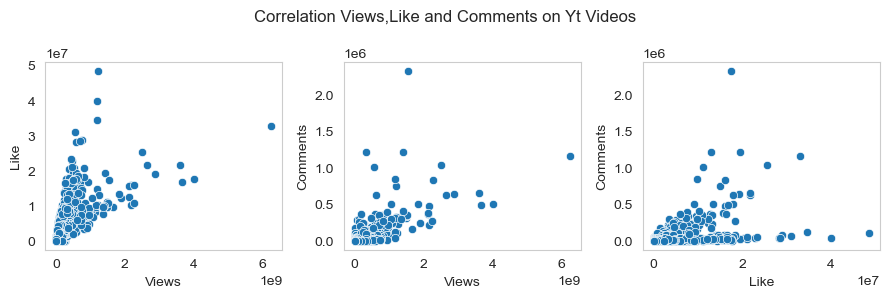

In [72]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(9,3))

sns.scatterplot(data=df_video_unique,x='Views', y='Like',ax=axes[0])
sns.scatterplot(data=df_video_unique,x='Views', y='Comments',ax=axes[1])
sns.scatterplot(data=df_video_unique,x='Like', y='Comments',ax=axes[2])

fig.suptitle('Correlation Views,Like and Comments on Yt Videos')
plt.tight_layout()
fig.savefig('Corr_VLC.png')

### Analysis stats - Drop outliers

#### Creation DataFrame without Outliers

In [75]:
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers=df[((df<(q1-1.5*IQR)) | (df>(q3 + 1.5*IQR)))]
    return outliers   

In [76]:
outliers_views = pd.DataFrame(find_outliers(df_video_unique['Views']))

In [77]:
df_video_withoutOV = df_video_unique.drop(outliers_views.index)

#### Distribution

In [79]:
df_video_withoutOV[['Views','Like','Comments']].describe()

,Views,Like,Comments
count,1.199400e+04,1.199400e+04,11994.000000
mean,2.919472e+06,1.319872e+05,1473.890362
std,4.417656e+06,2.233513e+05,3781.807210
min,9.000000e+00,0.000000e+00,0.000000
25%,2.017612e+05,6.793250e+03,155.000000
50%,9.184005e+05,3.657500e+04,484.500000
75%,3.544314e+06,1.501365e+05,1419.000000
max,2.121642e+07,1.860652e+06,179001.000000


C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


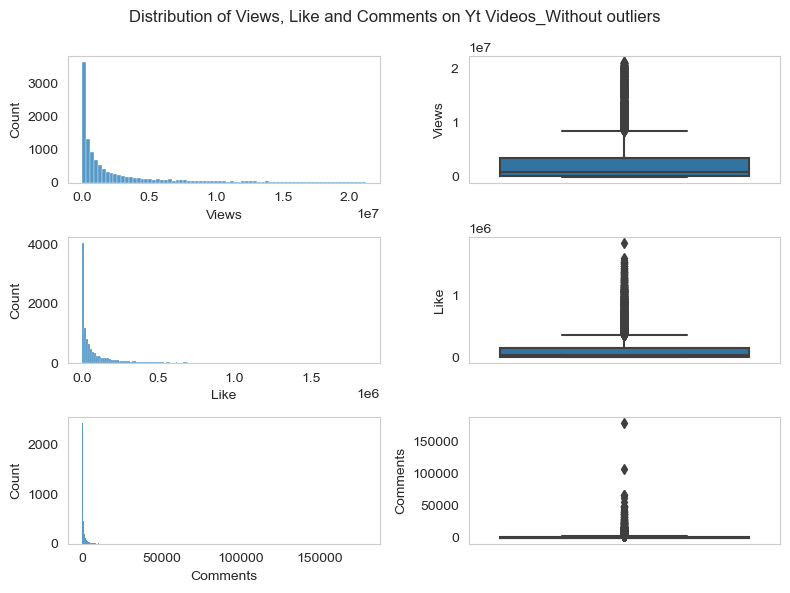

In [80]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(8,6))

sns.histplot(data=df_video_withoutOV,x='Views',ax=axes[0][0])
sns.boxplot(data=df_video_withoutOV,y='Views',ax=axes[0][1])

sns.histplot(data=df_video_withoutOV,x='Like',ax=axes[1][0])
sns.boxplot(data=df_video_withoutOV,y='Like',ax=axes[1][1])

sns.histplot(data=df_video_withoutOV,x='Comments',ax=axes[2][0])
sns.boxplot(data=df_video_withoutOV,y='Comments',ax=axes[2][1])

fig.suptitle("Distribution of Views, Like and Comments on Yt Videos_Without outliers")
plt.tight_layout()

fig.savefig('Distrib_VLC_withoutOut.png')

#### Correlation

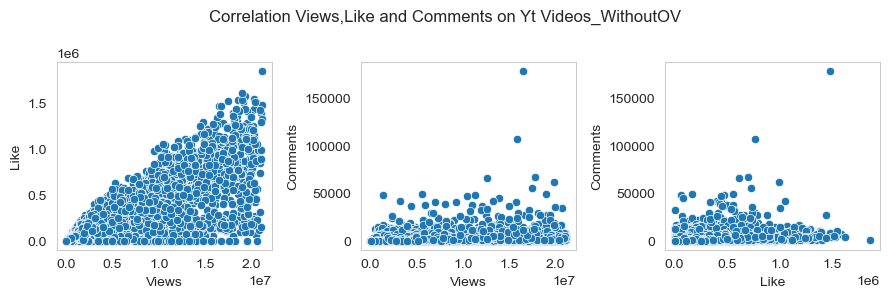

In [82]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(9,3))

sns.scatterplot(data=df_video_withoutOV,x='Views', y='Like',ax=axes[0])
sns.scatterplot(data=df_video_withoutOV,x='Views', y='Comments',ax=axes[1])
sns.scatterplot(data=df_video_withoutOV,x='Like', y='Comments',ax=axes[2])

fig.suptitle('Correlation Views,Like and Comments on Yt Videos_WithoutOV')

plt.tight_layout()
fig.savefig('Corr_VLC_without.png')



### Categories analysis

In [84]:
#analysis 75% most views videos and 25%less viewed videos !

In [85]:
q1Views = df_video_unique['Views'].quantile(0.25)
q3Views= df_video_unique['Views'].quantile(0.75)

In [86]:
df_max = df_video_unique[df_video_unique['Views'] > q3Views]
df_min = df_video_unique[df_video_unique['Views'] < q1Views]

In [87]:
len(df_max)

3557

In [88]:
df_max['group_category'].value_counts()

group_category
People&Blog       980
Entertainment     836
Music             804
Others            348
Comedy            306
Film&Animation    107
Education          95
Gaming             81
Name: count, dtype: int64

In [89]:
df_max.sort_values('Views',ascending=False)[['Views','group_category','creator']][:10]

,Views,group_category,creator
605,6263949289,Music,Ed Sheeran
57,4022109400,Music,OneRepublicVEVO
457,3664316209,Music,Passenger
530,3612590540,Music,Maroon5VEVO
24,2873644155,Music,Fueled By Ramen
72,2641648767,Music,ImagineDragonsVEVO
5788,2503387311,Music,Marshmello
546,2265573435,Music,gotyemusic
5877,2258274747,Music,ChainsmokersVEVO
13,2172546596,Music,Fueled By Ramen


In [90]:
6263949289 - 2172546596

4091402693

In [91]:
resultA = df_max.groupby("Videocategory")['Views'].mean().reset_index().sort_values('Views',ascending=False)

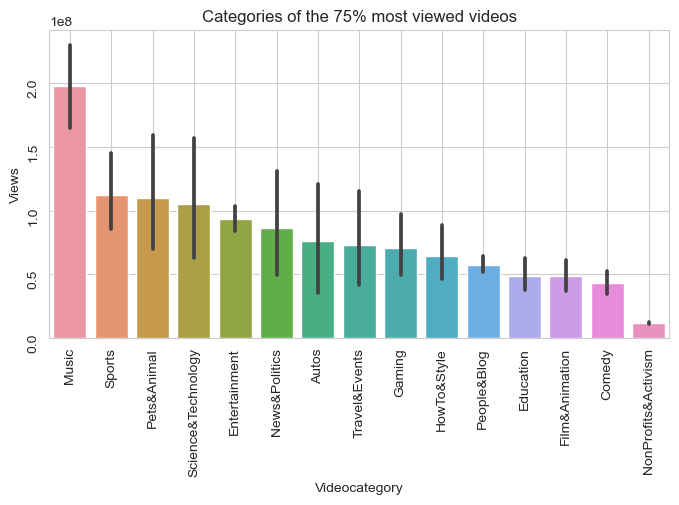

In [92]:
fig = plt.figure(figsize=(8,4))

sns.barplot(x='Videocategory', y="Views", data=df_max, order=resultA['Videocategory'])

plt.title('Categories of the 75% most viewed videos')
plt.tick_params(labelrotation=90)
plt.grid("whitegrid")

fig.savefig("75_cat.png",bbox_inches='tight')

In [93]:
resultB = df_min.groupby("Videocategory")['Views'].mean().reset_index().sort_values('Views')

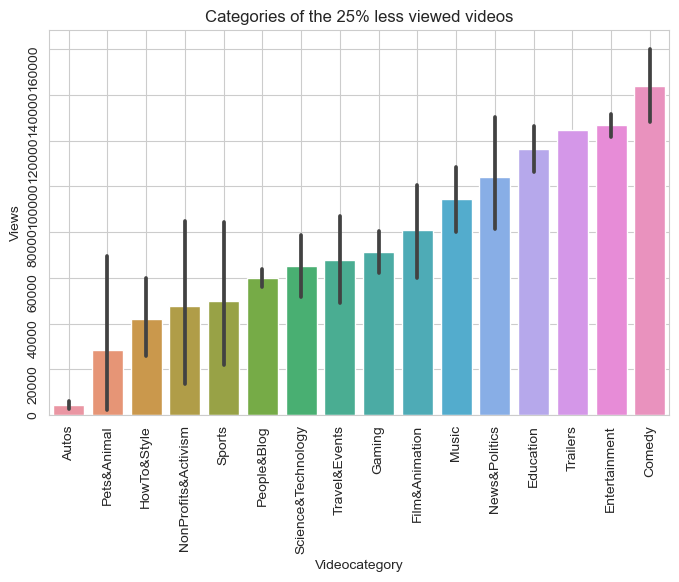

In [94]:
fig = plt.figure(figsize=(8,5))

sns.barplot(x='Videocategory', y="Views", data=df_min, order=resultB['Videocategory'])

plt.title('Categories of the 25% less viewed videos')
plt.tick_params(labelrotation=90)
plt.grid("whitegrid")

fig.savefig("25_cat.png",bbox_inches='tight')

## 

* Large disparity in the data: large quantity of videos have views, like and comments close to 0. But a small part of them are extremly watch and like by a lot of people. And the Standard deviation is far too large, even without the 'mathematical outliers', to use any good analysis.
* Top10 have a delta of more than 4 billion views (and are all music videos)
* The 75% most viewed videos are mostly music, then sports and pet&Animals videos. A lot of these categories are also in the less viewed videos ! 

* The correlation between Like and Views seems to be 'one way' : You have more like if you made a lot of views, but having a lot of views do not lead to a lot of like. 

* Med Views around 900.000 : which is still a big number of views : more than the disparity the dataset is biased : I have the videos the youtube algo proposed to me. Videos with already a lot of views!


# Channels stat

These data represent the channel that I liked the most : I have watched more than 10 of their videos 
* count : number of time I have watched the channel

In [394]:
df_channel

,Channel_name,channel_id,Channel_date,Subscribers,Views,country,Total_videos,count
0,CloudKid,UCSa8IUd1uEjlREMa21I3ZPQ,2013-07-30 20:10:22,5330000,2977615481,US,2766,1432
1,ImagineDragonsVEVO,UCpx_k19S2vUutWUUM9qmXEg,2012-01-23 18:04:00,9520000,14935596878,NaN,228,401
2,Adam Jensen,UChRJQ2QyKsY1EbBqM8GzzRg,2011-10-07 00:27:55,118000,91247548,US,71,330
3,McSkyz,UC4OjGShlHwNNd6jQ23GVJ5A,2011-07-18 09:49:59,1750000,284878737,FR,289,234
4,twenty one pilots,UCBQZwaNPFfJ1gZ1fLZpAEGw,2009-09-05 05:57:18,13400000,5837797696,US,217,193
...,...,...,...,...,...,...,...,...
307,Geon,UCwthtFbQ_4tcJAOMkKXLcNQ,2023-07-21 16:33:16,50900,172696539,PK,254,11
308,Anthony Crazy,UCwlLTQ2yiKu0GCwNK70-pww,2018-04-02 20:50:23,375000,174629941,FR,69,11
309,Laura Laune,UCb32WqbvB979c0rDifGZVvA,2013-08-24 13:27:03,293000,81071269,FR,91,11
310,P2 DBOXS,UCgO3YEcCq98JZVF672wX0lg,2023-03-25 19:36:09,318000,352213985,BD,103,11


## Exploration

### Top 5

In [99]:
df_channel.sort_values('count',ascending=False)[['Channel_name','count']].iloc[0:5]

,Channel_name,count
0,CloudKid,1432
1,ImagineDragonsVEVO,401
2,Adam Jensen,330
3,McSkyz,234
4,twenty one pilots,193


### % videos seen by channel

In [100]:
df_channel['per_viewvid'] = 100*(df_channel['count'] / df_channel['Total_videos'])
df_channel['per_viewvid'].describe()

count    312.000000
mean      25.464153
std       57.690466
min        0.074251
25%        3.675048
50%        8.802516
75%       21.079545
max      503.846154
Name: per_viewvid, dtype: float64

In [101]:
df_channel.sort_values('per_viewvid',ascending=True).iloc[0:5]

,Channel_name,channel_id,Channel_date,Subscribers,Views,country,Total_videos,count,per_viewvid
234,Law&Crime Network,UCz8K1occVvDTYDfFo7N5EZw,2015-08-28 17:26:16,5870000,3841591346,US,18855,14,0.074251
216,Le Parisien,UCfHn_8-ehdem86fEvlFg-Gw,2014-10-06 16:42:09,1500000,2135451652,FR,15873,16,0.100800
77,France Inter,UCJldRgT_D7Am-ErRHQZ90uw,2011-09-19 09:03:53,1170000,1774899557,FR,37520,43,0.114606
177,FilmsActu,UC_i8X3p8oZNaik8X513Zn1Q,2009-10-16 09:05:21,4600000,3297366164,FR,11850,20,0.168776
253,TF1 INFO,UCsrPUA0ZSDCNZC6wyRlR7ZA,2022-01-07 12:45:36,756000,460414773,FR,4822,13,0.269598


I have watched on average 25% of all the videos on a channel. Those I have watched the less are news channel, who post a huge nmber of videos.

### date creation channel

In [102]:
df_channel['Channel_date'].dt.year.describe()


count     312.000000
mean     2015.419872
std         4.658083
min      2005.000000
25%      2012.000000
50%      2015.000000
75%      2020.000000
max      2023.000000
Name: Channel_date, dtype: float64

### country 

In [103]:
df_country = pd.DataFrame(df_channel['country'].value_counts())
df_country = df_country.reset_index()

In [104]:
df_country

,country,count
0,FR,118
1,US,50
2,GB,12
3,CA,9
4,KR,2
5,FI,2
6,SI,2
7,AU,2
8,BE,2
9,IN,2


In [233]:
df_channel['country_group'] = df_channel['country'].replace(to_replace = ['KR','FI','SI','AU','BE','IN','CZ','JP','DE','CH','TH','TR','RU','IS','NL','PA','PK','BD'], value = 'Others') 

In [237]:
df_country = pd.DataFrame(df_channel['country_group'].value_counts())
df_country = df_country.reset_index()

In [239]:
df_country

,country_group,count
0,FR,118
1,US,50
2,Others,24
3,GB,12
4,CA,9


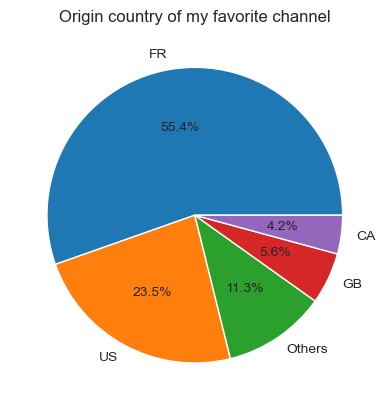

In [263]:
fig = plt.figure()
plt.pie(df_country['count'],labels=df_country['country_group'],autopct='%1.1f%%')
plt.title('Origin country of my favorite channel')

fig.savefig("country.png")
plt.show()

## Correlation subscribers/Views/NbOfVideos

In [309]:
df_channel[['Subscribers','Views','Total_videos']].corr()

,Subscribers,Views,Total_videos
Subscribers,1.000000,0.801369,0.019127
Views,0.801369,1.000000,0.086544
Total_videos,0.019127,0.086544,1.000000


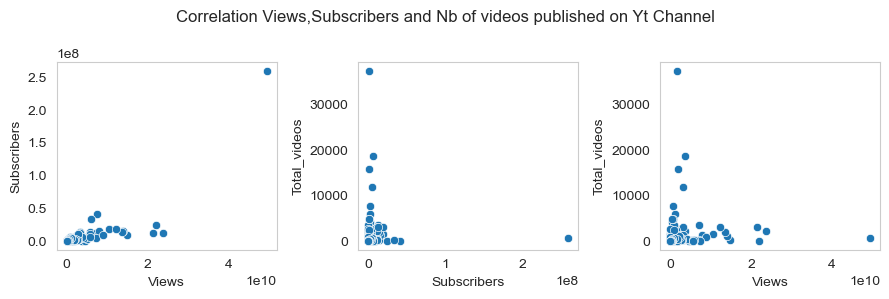

In [311]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(9,3))

sns.scatterplot(data=df_channel,x='Views', y='Subscribers',ax=axes[0])
sns.scatterplot(data=df_channel,x='Subscribers', y='Total_videos',ax=axes[1])
sns.scatterplot(data=df_channel,x='Views', y='Total_videos',ax=axes[2])

fig.suptitle('Correlation Views,Subscribers and Nb of videos published on Yt Channel')

plt.tight_layout()
fig.savefig('Corr_Channel.png')


In [396]:
df_channel.sort_values('Subscribers',ascending=False).iloc[0]

Channel_name                     MrBeast
channel_id      UCX6OQ3DkcsbYNE6H8uQQuVA
Channel_date         2012-02-20 00:43:50
Subscribers                    260000000
Views                        49338181161
country                               US
Total_videos                         794
count                                104
Name: 22, dtype: object

In [398]:
df_channel.sort_values('Total_videos',ascending=False).iloc[0]

Channel_name                France Inter
channel_id      UCJldRgT_D7Am-ErRHQZ90uw
Channel_date         2011-09-19 09:03:53
Subscribers                      1170000
Views                         1774899557
country                               FR
Total_videos                       37520
count                                 43
Name: 77, dtype: object

In [400]:
df_channel[df_channel['Channel_name']=='MrBeast']

,Channel_name,channel_id,Channel_date,Subscribers,Views,country,Total_videos,count
22,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,2012-02-20 00:43:50,260000000,49338181161,US,794,104


In [402]:
df_channel[df_channel['Channel_name']=='France Inter']

,Channel_name,channel_id,Channel_date,Subscribers,Views,country,Total_videos,count
77,France Inter,UCJldRgT_D7Am-ErRHQZ90uw,2011-09-19 09:03:53,1170000,1774899557,FR,37520,43


In [ ]:
df_channel_whithout = df_channel.copy()
df_channel_whithout = df_channel_without.drop(22)
df_channel_whithout = df_channel_without.drop(77)

In [404]:
len(df_channel)

312

In [408]:
len(df_channel_whithout)

310

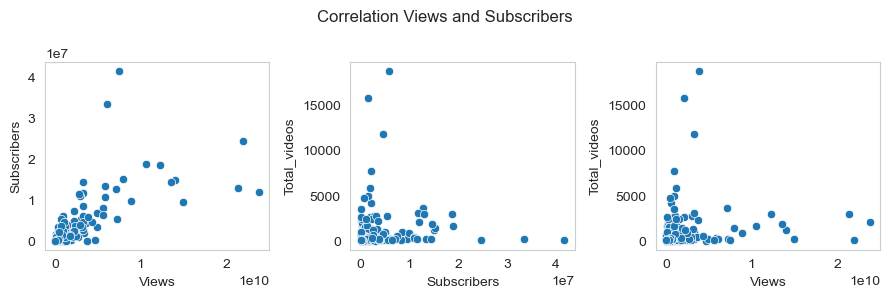

In [410]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(9,3))

sns.scatterplot(data=df_channel_whithout,x='Views', y='Subscribers',ax=axes[0])
sns.scatterplot(data=df_channel_whithout,x='Subscribers', y='Total_videos',ax=axes[1])
sns.scatterplot(data=df_channel_whithout,x='Views', y='Total_videos',ax=axes[2])

fig.suptitle('Correlation Views and Subscribers')

plt.tight_layout()
fig.savefig('Corr_VS_minusMrBeastFI.png')



In [412]:
df_channel_whithout[['Subscribers','Views','Total_videos']].corr()

,Subscribers,Views,Total_videos
Subscribers,1.000000,0.718419,0.123613
Views,0.718419,1.000000,0.173591
Total_videos,0.123613,0.173591,1.000000


#

* The channels I viewed the most are (obviously) music
* I watch on average 25% of the videos from channels that I like. The one where I only saw a small portion of the videos are the news channels which post a very large quantity of videos.
* Mostly French videos but a good part of english videos comming form the US and Great Britain